### SEMICONDUCTOR MANUFACTURING LINE FAILURE PREDICTION

## STEP1: EXPLORATORY DATA ANALYSIS

In [1]:
#Import the Data set
import pandas as pd
import numpy as np

data=pd.read_csv("C:/myGitCodeBase/version-control/predictive-maintenance/SECOMData.csv",index_col=0)
from sklearn.metrics import mean_squared_error


In [2]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [3]:
from IPython.display import display
display(data)
data.head(5)

,Class,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,...,Sensor581,Sensor582,Sensor583,Sensor584,Sensor585,Sensor586,Sensor587,Sensor588,Sensor589,Sensor590
1,pass,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
2,pass,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
3,fail,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
4,pass,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
5,pass,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
6,pass,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
7,pass,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
8,pass,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,...,0.0063,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
9,pass,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,...,0.0045,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
10,pass,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,...,0.0073,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


,Class,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,...,Sensor581,Sensor582,Sensor583,Sensor584,Sensor585,Sensor586,Sensor587,Sensor588,Sensor589,Sensor590
1,pass,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
2,pass,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
3,fail,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
4,pass,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
5,pass,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [4]:
len(data.index) # Gives number of Observations

1567

In [5]:
len(data.columns) # Gives number of Sensors

592

In [6]:
data.describe()

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,...,Sensor581,Sensor582,Sensor583,Sensor584,Sensor585,Sensor586,Sensor587,Sensor588,Sensor589,Sensor590
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [7]:
data.dtypes

Class         object
Time          object
Sensor1      float64
Sensor2      float64
Sensor3      float64
Sensor4      float64
Sensor5      float64
Sensor6      float64
Sensor7      float64
Sensor8      float64
Sensor9      float64
Sensor10     float64
Sensor11     float64
Sensor12     float64
Sensor13     float64
Sensor14     float64
Sensor15     float64
Sensor16     float64
Sensor17     float64
Sensor18     float64
Sensor19     float64
Sensor20     float64
Sensor21     float64
Sensor22     float64
Sensor23     float64
Sensor24     float64
Sensor25     float64
Sensor26     float64
Sensor27     float64
Sensor28     float64
              ...   
Sensor561    float64
Sensor562    float64
Sensor563    float64
Sensor564    float64
Sensor565    float64
Sensor566    float64
Sensor567    float64
Sensor568    float64
Sensor569    float64
Sensor570    float64
Sensor571    float64
Sensor572    float64
Sensor573    float64
Sensor574    float64
Sensor575    float64
Sensor576    float64
Sensor577    

In [8]:
#The Time column does not have any use in our model. So we will drop this column
data = data.drop('Time',1)

In [9]:
# Count the Number of Missing Reading from Every Sensor 
column_NA = pd.isnull(data).sum()/len(data.index)

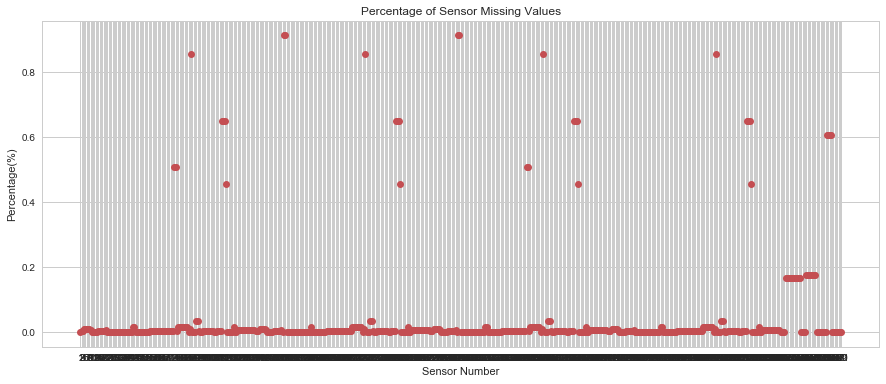

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

dim = np.arange(1, len(data.columns)+1)
plt.plot(dim,column_NA, 'ro', color='r')
plt.xticks(dim)
plt.title('Percentage of Sensor Missing Values')
plt.xlabel('Sensor Number')
plt.ylabel('Percentage(%)')
plt.show()


In [11]:
# A significant number of sensors have a very high percentage of missing values.
# This sensors does not provide any useful information or predictive power to our model.
# Lets list those sensors with high percentage of missing values. 
# Nearly 32 of the 591 sensors have missing value of more than 40%
missing_value_sensors = data.columns[column_NA > 0.4]

In [12]:
len(missing_value_sensors)

32

In [13]:
# Lets keep those sensors with less than 40% of the data as NANs
data.columns[column_NA < 0.4]

Index(['Class', 'Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5',
       'Sensor6', 'Sensor7', 'Sensor8', 'Sensor9',
       ...
       'Sensor577', 'Sensor578', 'Sensor583', 'Sensor584', 'Sensor585',
       'Sensor586', 'Sensor587', 'Sensor588', 'Sensor589', 'Sensor590'],
      dtype='object', length=559)

In [14]:
# New Data set with the Reduced set of Sensors 
data.new = data[data.columns[column_NA < 0.4]]
data.new.head()

,Class,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,...,Sensor577,Sensor578,Sensor583,Sensor584,Sensor585,Sensor586,Sensor587,Sensor588,Sensor589,Sensor590
1,pass,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
2,pass,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
3,fail,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
4,pass,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
5,pass,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [15]:
Sensor6=data.new.loc[:,"Sensor6"].head()
Sensor1=data.new.loc[:,"Sensor1"].head()
Sensor2=data.new.loc[:,"Sensor2"].head()


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  30.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([  99.5       ,   99.53333333,   99.56666667,   99.6       ,
          99.63333333,   99.66666667,   99.7       ,   99.73333333,
          99.76666667,   99.8       ,   99.83333333,   99.86666667,
          99.9       ,   99.93333333,   99.96666667,  100.        ,
         100.03333333,  100.06666667,  100.1       ,  100.13333333,
         100.16666667,  100.2       ,  100.23333333,  100.26666667,
         100.3       ,  100.33333333,  100.36666667,  100.4       ,
         100.43333333,  100.46666667,  100.5       ]),
 <a list of 30 Patch objects>)

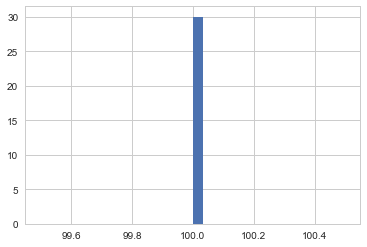

In [16]:
#data.hist[column ="Sensor6",bin = 60]
%matplotlib inline

plt.hist(Sensor6, normed=True, bins=30)


(array([ 0.01225716,  0.        ,  0.        ,  0.01225716,  0.        ,
         0.        ,  0.02451431,  0.        ,  0.        ,  0.01225716]),
 array([ 2932.61 ,  2948.927,  2965.244,  2981.561,  2997.878,  3014.195,
         3030.512,  3046.829,  3063.146,  3079.463,  3095.78 ]),
 <a list of 10 Patch objects>)

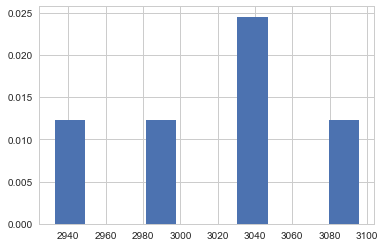

In [17]:
plt.hist(Sensor1, normed=True)

(array([ 0.02023063,  0.02023063,  0.        ,  0.02023063,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.04046126]),
 array([ 2465.14 ,  2475.026,  2484.912,  2494.798,  2504.684,  2514.57 ,
         2524.456,  2534.342,  2544.228,  2554.114,  2564.   ]),
 <a list of 10 Patch objects>)

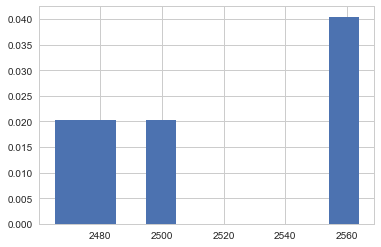

In [18]:
plt.hist(Sensor2, normed=True)

In [19]:
# In the table above we see some sensors like Sensor6 have constant values. 
# This has no utlitily , as only sensors values with variance have information that can be used to do prediction.
sensor_useful_df = data.new.loc[:,data.new.nunique(dropna=True) != 1]

In [20]:
sensor_useful_df.head()

,Class,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor7,Sensor8,Sensor9,Sensor10,...,Sensor577,Sensor578,Sensor583,Sensor584,Sensor585,Sensor586,Sensor587,Sensor588,Sensor589,Sensor590
1,pass,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
2,pass,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
3,fail,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
4,pass,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
5,pass,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [21]:
# Now we have 443 sensors with useful readings. But some of these sensors still have missing value, which needs to be imputed.

sensor_useful_df.Class.value_counts()


pass    1463
fail     104
Name: Class, dtype: int64

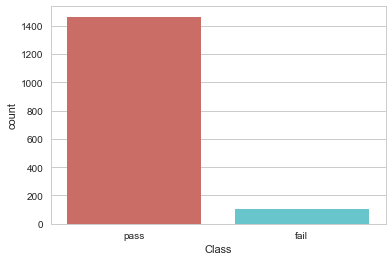

In [22]:
# Plot class Distribution

sns.countplot(x='Class', data=sensor_useful_df, palette ='hls')
plt.show()
plt.savefig('countplot')

# Also the distribution of the Pass Fail plotted below shows that there data is highly imbalanced. Meaning we have more data 
#available to learn about the PASS condition while very less data to learn about the FAIL condition.

## DATA IMPUTATION

For filling the missing sensor values we will use the KNN Algorithm based imputation technique. 
KNN is an algorithm that is useful for matching a point with its closest k neighbors in a multi-dimensional space.

It can be used for data that are continuous, discrete, ordinal and categorical which makes it particularly useful for 
dealing with all kind of missing data.

The assumption behind using KNN for missing values is that a point value can be approximated by the values of the points
that are closest to it, based on other variables.


In [23]:
from fancyimpute import KNN    

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\manivassakam\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [24]:
# Drop the Class column and used the Remaining Sensor Data for Imputation
df_numeric = sensor_useful_df.iloc[:, 1:443].values
sensor_df_filled = pd.DataFrame(KNN(3).complete(df_numeric))

Imputing row 1/1567 with 12 missing, elapsed time: 12.078
Imputing row 101/1567 with 8 missing, elapsed time: 12.157
Imputing row 201/1567 with 12 missing, elapsed time: 12.175
Imputing row 301/1567 with 12 missing, elapsed time: 12.203
Imputing row 401/1567 with 0 missing, elapsed time: 12.233
Imputing row 501/1567 with 20 missing, elapsed time: 12.269
Imputing row 601/1567 with 20 missing, elapsed time: 12.325
Imputing row 701/1567 with 15 missing, elapsed time: 12.386
Imputing row 801/1567 with 12 missing, elapsed time: 12.413
Imputing row 901/1567 with 0 missing, elapsed time: 12.447
Imputing row 1001/1567 with 0 missing, elapsed time: 12.461
Imputing row 1101/1567 with 0 missing, elapsed time: 12.467
Imputing row 1201/1567 with 0 missing, elapsed time: 12.472
Imputing row 1301/1567 with 0 missing, elapsed time: 12.479
Imputing row 1401/1567 with 0 missing, elapsed time: 12.484
Imputing row 1501/1567 with 8 missing, elapsed time: 12.500


In [25]:
# Imputation Removed columns names. Refill the column names as before.
sensor_df_filled.columns = sensor_useful_df.columns[1:443]
sensor_df_filled.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,...,Sensor577,Sensor578,Sensor583,Sensor584,Sensor585,Sensor586,Sensor587,Sensor588,Sensor589,Sensor590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.016272,0.013306,0.004499,76.825833
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200


# DATA NORMALIZATION

As we see in the above table, some of the Sensor readings ae in a higher scale compared to others.
To prevent some of the features to over-power others in the Logistic Regression model we should first normalized the data.

In [26]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
sensor_df_filled[sensor_df_filled.columns] = min_max_scaler.fit_transform(sensor_df_filled[sensor_df_filled.columns])
sensor_df_filled.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,...,Sensor577,Sensor578,Sensor583,Sensor584,Sensor585,Sensor586,Sensor587,Sensor588,Sensor589,Sensor590
0,0.469231,0.589292,0.499096,0.379841,0.000609,0.328562,0.965785,0.665019,0.542479,0.358362,...,0.011285,0.112244,0.709375,0.012325,0.017510,0.011880,0.277122,0.131754,0.126785,0.104198
1,0.575003,0.445535,0.666763,0.393982,0.000133,0.428942,0.969673,0.656639,0.412315,0.228669,...,0.004934,0.068396,0.753125,0.034637,0.036965,0.033099,0.221387,0.220339,0.181159,0.282386
2,0.308868,0.583388,0.493903,0.457065,0.000744,0.283455,0.965008,0.542759,0.448168,0.411832,...,0.015949,0.050771,0.562500,0.020612,0.021401,0.020152,0.629073,0.589309,0.500000,0.112383
3,0.400385,0.466998,0.543479,0.244894,0.000574,0.469123,0.946345,0.638590,0.319564,0.359499,...,0.012198,0.043312,0.662500,0.009137,0.007782,0.008734,0.309942,0.152542,0.123188,0.100153
4,0.471367,0.500400,0.678327,0.357067,0.000765,0.387631,0.960342,0.670606,0.392050,0.315131,...,0.011097,0.069148,0.068750,1.000000,1.000000,1.000000,0.309942,0.152542,0.123188,0.100153


## SPLIT DATA INTO TRAIN AND TEST

In [27]:
X = sensor_df_filled.iloc[:, 1:442].values        # independent feature variables are the Sensor Readings
y = sensor_useful_df.iloc[:,0].values             # dependent categorical variables (pass/fail) from the original df.

In [28]:
#Encoding Categorical Data Class which is now PASS/FAIL as 1/0
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

y = labelencoder.fit_transform(y)

In [29]:
# Split the data into 80% training and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [31]:
num_zeros = (y_train == 0).sum()
num_ones = (y_train == 1).sum()
num_zeros


80

In [32]:
num_ones

1173

As we see the training data set has a class imbalance problem . 
There are 1173 cases of pass and 80 cases of fail in the training split

## TREATING CLASS IMBALANCE IN THE TRAINING DATA

TO treat the class imbalance seen in the distribution we can logically do two things. 

1. Add more failure cases which is the minority Class. This is called Oversampling
2. Reduce the no of observations in the majority Class. This is called Undersampling.

Give the high dimensionality, large no of features vs the observations undersampling will result in very 
less amount of observations making it difficult for any algorithm to learn from it.
Hence we will do Oversampling of the minority class. We do this by an algorithm called SMOTE.
SMOTE stand for (Synthetic Minority Oversampling Technique). 

At a high level, SMOTE creates synthetic observations of the minority class (yeild Failure) by:

Finding the k-nearest-neighbors for minority class observations (finding similar observations)
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, 
new observation.

Here oversampling approach does not  replicate minority class but constructs a new minority class data 
instance via an algorithm. Just duplicating the minority classes could lead the classifier to overfitting.



In [33]:
# Resample the Training Data alone.
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio = 'auto',kind='regular')
x_res, y_res = sm.fit_sample(X_train, y_train)
print (np.bincount(y_res))

[1173 1173]


In [34]:
y_res

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [35]:
num_zeros = (y_res == 0).sum()
num_ones = (y_res == 1).sum()
num_zeros

1173

In [36]:
num_ones

1173

Now we have a training Data Set which is balanced with number of passes and fails.

## Base Line Model : Logistic Regression 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_res, y_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [39]:
# Logistic Regression using K-Fold Cross Validation

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_res, y_res, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.869


In [146]:
results

array([ 0.82978723,  0.79574468,  0.78297872,  0.84255319,  0.8212766 ,
        0.91489362,  0.91452991,  0.93589744,  0.91880342,  0.93162393])

In [147]:
logreg2 = LogisticRegression(random_state=10)
logreg2.fit(x_res, y_res)
y_pred = logreg2.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [148]:
logreg3 = LogisticRegression(random_state=20)
logreg3.fit(x_res, y_res)
y_pred = logreg3.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg3.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [149]:
logreg4 = LogisticRegression(random_state=30)
logreg4.fit(x_res, y_res)
y_pred = logreg4.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg4.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [150]:
logreg5 = LogisticRegression(random_state=40)
logreg5.fit(x_res, y_res)
y_pred = logreg5.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg5.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


## Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred,labels=[0,1])
print(confusion_matrix)

[[  9  15]
 [ 47 243]]


## Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches 
its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision 
are equally important.

The support is the number of occurrences of each class in y_test.

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.16      0.38      0.23        24
          1       0.94      0.84      0.89       290

avg / total       0.88      0.80      0.84       314



## ROC Curve


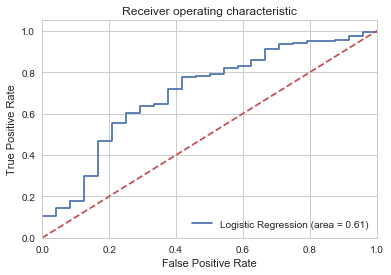

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Tree-based Ensemble methods : Random Forest Based Classifier

In [43]:
# Random Forest Based Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
y_pred = rfc.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.91


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  3  21]
 [  8 282]]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.27      0.12      0.17        24
          1       0.93      0.97      0.95       290

avg / total       0.88      0.91      0.89       314



The Random Forest Model provides a better accuracy and while recall has been poorer than the baseline logistic regression model.

# Refining the Random Forest Classifier Model

In [127]:
rfc2 = RandomForestClassifier( max_features='sqrt',min_samples_leaf=70,n_estimators=120)
rfc2.fit(x_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=70, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [128]:
y_pred = rfc2.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.91


In [129]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  7  17]
 [ 29 261]]


In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.19      0.29      0.23        24
          1       0.94      0.90      0.92       290

avg / total       0.88      0.85      0.87       314



In [ ]:
By tuning the max_features,min_samples_leaf and the n_estimators we have been able to increase the Recall of the Failure cases 
while maintaing the overall accuracy at 91%. 

# Relative Importance of Sensors

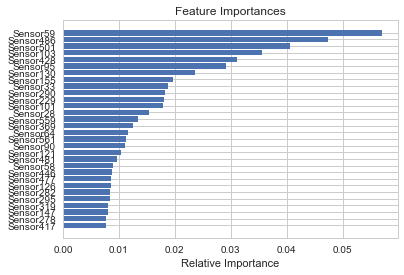

In [143]:
features = sensor_df_filled.columns

importances = rfc2.feature_importances_
indices = np.argsort(importances)[-30:]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()